<a href="https://colab.research.google.com/github/Alenushka2013/Customer-Personality-Analysis/blob/main/Regression_for_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

path = 'https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/marketing_campaign.csv'
df = pd.read_csv(path, sep = '\t')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df = df.set_index(keys='ID')
df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

In [4]:
df.head(1)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1


In [5]:
def df_info(df):
  df_info = pd.DataFrame({
      'column_type': df.dtypes,
      'number_of_unique_values': df.nunique(),
      'number_of_missing_values': df.isna().sum(),
  })

  values_list = []
  for col in df.columns:
      if df[col].dtype == 'object' or df[col].dtype.name == 'category':
          # категоріальна: список унікальних значень
          values_list.append(df[col].unique())
      elif np.issubdtype(df[col].dtype, np.number):
          # числова: мін та макс
          values_list.append((df[col].min(), df[col].max()))
      else:
          values_list.append(None)  # інші типи

  df_info['values'] = values_list
  display(df_info)

In [6]:
df_info

<function __main__.df_info(df)>

In [7]:
df['Age'] = 2014 - df.Year_Birth
df.drop('Year_Birth', axis = 1, inplace = True)

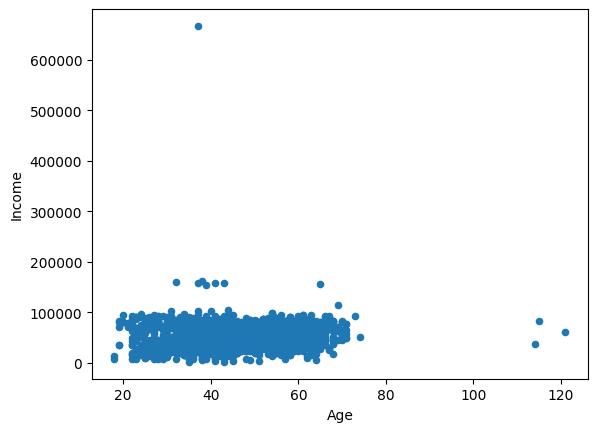

In [8]:
var = 'Age'
data = pd.concat([df['Income'], df[var]], axis=1)
data.plot.scatter(x=var, y='Income');#, ylim=(0,2000));

In [9]:
def remove_outliers_iqr(df, column, n = 1.5, remove = False):
    """
    Виявляє та видаляє (remove = Ture) викиди зі вказаного стовпця DataFrame
    за допомогою методу міжквартильного розмаху (IQR).

    Параметри:
    - df (pd.DataFrame): Вхідний DataFrame.
    - column (str): Назва стовпця, в якому шукати викиди.
    - n: коефіцієнт міжквартильного розмаху.
    - remove: видаляти чи ні спостереження з викидами.

    Повертає:
    - pd.DataFrame: DataFrame без викидів, якщо викиди видаляються.

    """
    print(df[column].min(), '<=', column, '<=', df[column].max())

    # Обчислення Q1, Q3 та IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Визначення меж для викидів
    lower_bound = Q1 - n * IQR
    upper_bound = Q3 + n * IQR

    print("Визначення меж для викидів")
    print(f'Q1 - {n} * IQR =', lower_bound)
    print(f'Q3 + {n} * IQR =', upper_bound, '\n')

    # Виявлення викидів
    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers_df = df[outliers_mask]
    if len(outliers_df) > 0:
      print(f'Значення, які є викидами для ознаки {column} при n = {n} в кількості {len(outliers_df) }')
      display(outliers_df)
      print('-' * 70, '\n\n')

    if remove:
      df_no_outliers = df[~outliers_mask]
      print(f"Зі стовпця '{column}' видалено {len(outliers_df)} викидів.")
      return df_no_outliers, outliers_df

In [10]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [11]:
columns_to_check_outliers = ['Income', 'Age']
for col in columns_to_check_outliers:
  remove_outliers_iqr(df, col, n = 1.5, remove = False)

1730.0 <= Income <= 666666.0
Визначення меж для викидів
Q1 - 1.5 * IQR = -14525.5
Q3 + 1.5 * IQR = 118350.5 

Значення, які є викидами для ознаки Income при n = 1.5 в кількості 8


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,
8475,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,...,0,0,0,0,0,0,0,0,0,41
1503,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,...,1,1,0,0,0,0,0,0,0,38
5555,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,1,...,0,0,0,0,0,0,0,0,0,39
1501,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,...,1,0,0,0,0,0,0,0,0,32
5336,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,...,1,1,0,0,0,0,0,0,0,43
4931,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,...,0,1,0,0,0,0,0,0,0,37
11181,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,...,0,0,0,0,0,0,0,0,0,65
9432,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,...,3,6,0,0,0,0,0,0,0,37


---------------------------------------------------------------------- 


18 <= Age <= 121
Визначення меж для викидів
Q1 - 1.5 * IQR = 10.0
Q3 + 1.5 * IQR = 82.0 

Значення, які є викидами для ознаки Age при n = 1.5 в кількості 3


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,
7829,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,...,2,5,0,0,0,0,0,1,0,114
11004,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,...,2,4,0,0,0,0,0,0,0,121
1150,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,...,4,1,0,0,1,0,0,0,0,115


---------------------------------------------------------------------- 




In [12]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [13]:
df['Dt_Customer'].min(), df['Dt_Customer'].max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

In [14]:
df['Days_diff'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

In [15]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month
df['Day'] = df['Dt_Customer'].dt.day

In [16]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

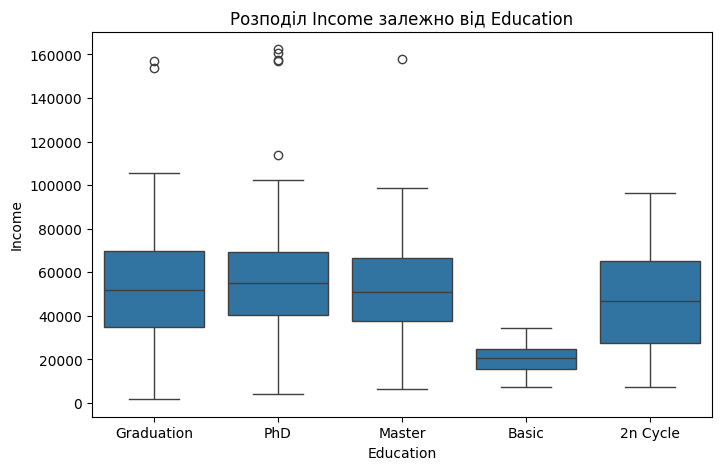

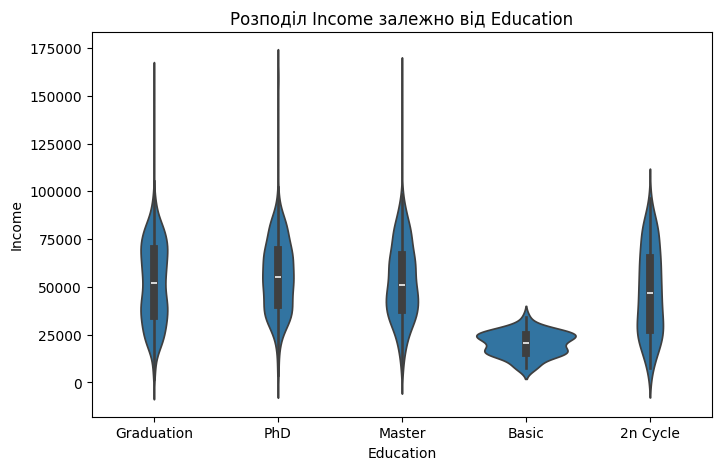

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df[df.Income < 500000]
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Education', y='Income', data=data)
plt.title(f'Розподіл {'Income'} залежно від {'Education'}')
plt.show();

# Або Violinplot (показує щільність розподілу)
plt.figure(figsize=(8,5))
sns.violinplot(x='Education', y='Income', data=data)
plt.title(f'Розподіл {'Income'} залежно від {'Education'}')
plt.show();

In [18]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

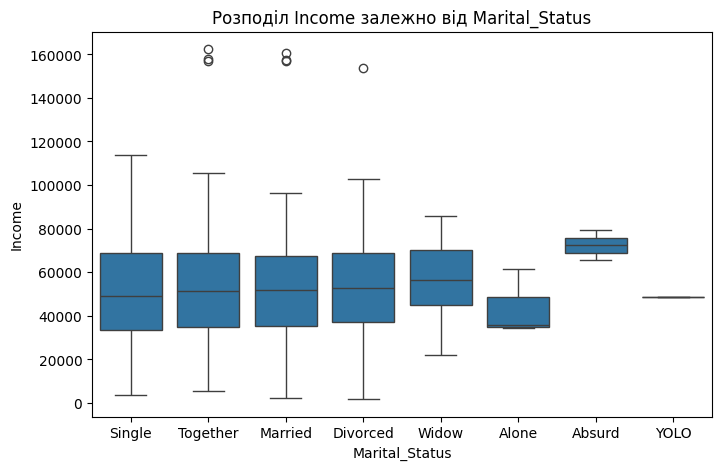

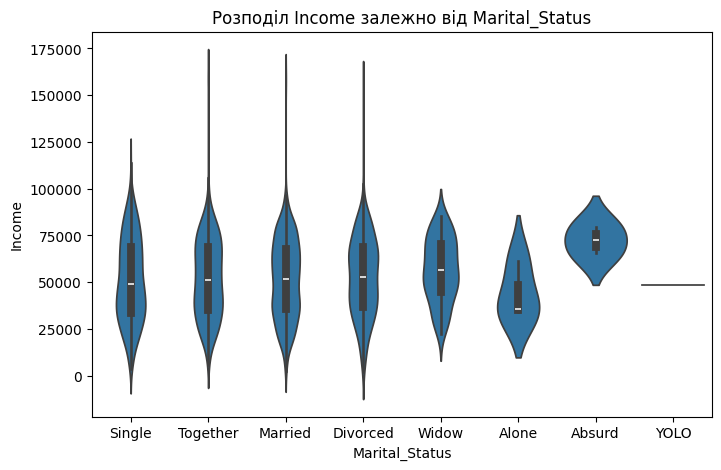

In [19]:
data = df[df.Income < 500000]
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Marital_Status', y='Income', data=data)
plt.title(f'Розподіл {'Income'} залежно від {'Marital_Status'}')
plt.show();

# Або Violinplot (показує щільність розподілу)
plt.figure(figsize=(8,5))
sns.violinplot(x='Marital_Status', y='Income', data=data)
plt.title(f'Розподіл {'Income'} залежно від {'Marital_Status'}')
plt.show();

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2240 non-null   int64         
 4   Teenhome             2240 non-null   int64         
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntWines             2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-null 

In [21]:
df.drop('Dt_Customer', axis = 1, inplace = True)

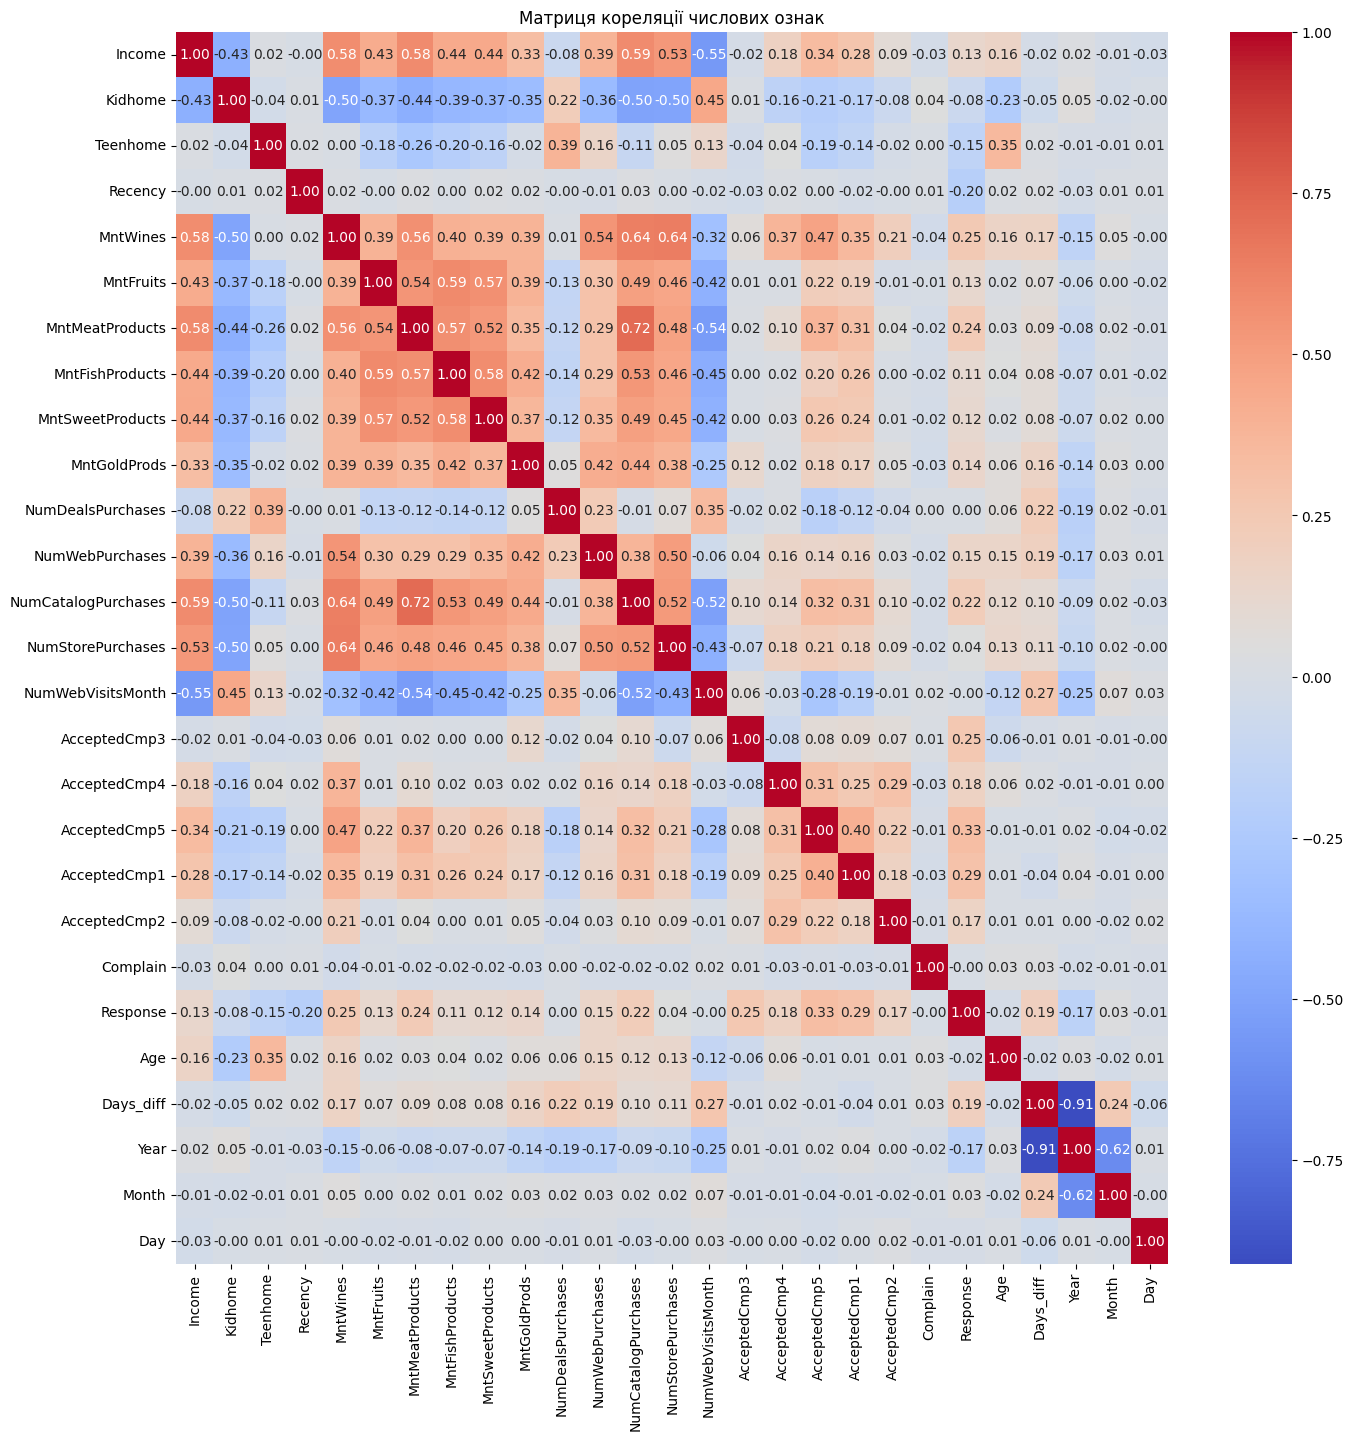

In [22]:
# обираємо числові ознаки
numeric_df = df.select_dtypes(include='number')

# обчислюємо матрицю кореляції
corr_matrix = numeric_df.corr()

# будуємо теплову карту
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Матриця кореляції числових ознак")
plt.show()

In [23]:
numeric_df.corr().Income.sort_values(key=abs, ascending=False)[1:]

,Income
NumCatalogPurchases,0.589162
MntMeatProducts,0.584633
MntWines,0.578650
NumWebVisitsMonth,-0.553088
NumStorePurchases,0.529362
MntSweetProducts,0.440744
MntFishProducts,0.438871
MntFruits,0.430842
Kidhome,-0.428669
NumWebPurchases,0.387878


In [24]:
df_test = df[(df.isnull().any(axis=1)) | (df["Income"] > 500000)]

In [29]:
df_test

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_diff,Year,Month,Day
ID,,,,,,,,,,,,,,,,,,,,,
1994,Graduation,Married,NaN,1,0,11,5,5,6,0,...,0,0,0,0,0,31,226,2013,11,15
5255,Graduation,Single,NaN,1,0,19,5,1,3,3,...,0,0,0,0,0,28,494,2013,2,20
7281,PhD,Single,NaN,0,0,80,81,11,50,3,...,0,0,0,0,0,55,236,2013,11,5
7244,Graduation,Single,NaN,2,1,96,48,5,48,6,...,0,0,0,0,0,63,179,2014,1,1
8557,Graduation,Single,NaN,1,0,57,11,3,22,2,...,0,0,0,0,0,32,377,2013,6,17
10629,2n Cycle,Married,NaN,1,0,25,25,3,43,17,...,0,0,0,0,0,41,653,2012,9,14
8996,PhD,Married,NaN,2,1,4,230,42,192,49,...,0,0,0,0,0,57,587,2012,11,19
9235,Graduation,Single,NaN,1,1,45,7,0,8,2,...,0,0,0,0,0,57,33,2014,5,27
5798,Master,Together,NaN,0,0,87,445,37,359,98,...,0,0,0,0,0,41,218,2013,11,23


In [25]:
df_raw = df[~(df.isnull().any(axis=1)) & (df["Income"] <= 500000)]

In [26]:
df_info(df)

,column_type,number_of_unique_values,number_of_missing_values,values
Education,object,5,0,"[Graduation, PhD, Master, Basic, 2n Cycle]"
Marital_Status,object,8,0,"[Single, Together, Married, Divorced, Widow, A..."
Income,float64,1974,24,"(1730.0, 666666.0)"
Kidhome,int64,3,0,"(0, 2)"
Teenhome,int64,3,0,"(0, 2)"
Recency,int64,100,0,"(0, 99)"
MntWines,int64,776,0,"(0, 1493)"
MntFruits,int64,158,0,"(0, 199)"
MntMeatProducts,int64,558,0,"(0, 1725)"
MntFishProducts,int64,182,0,"(0, 259)"


In [27]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Days_diff', 'Year', 'Month', 'Day'],
      dtype='object')

In [28]:
col_for_encoding = ['Education', 'Marital_Status']
col_for_scaling = ['Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Days_diff']

col_bin = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response']

target = 'Income'


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error


X = df_raw[col_for_encoding + col_for_scaling + col_bin]
y = df_raw[target]

# Розділяємо на train та test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_for_scaling),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), col_for_encoding)
    ],
    remainder='passthrough'
)

# Створюємо пайплайн
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Навчаємо модель
pipeline.fit(X_train, y_train)

# Прогноз на тесті
y_pred = pipeline.predict(X_test)

# Оцінка моделі
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {rmse:.1f}')
print(f'R2: {r2:.2f}')

MSE: 11173.9
R2: 0.76


In [ ]:
# Важливість ознак
# Витягуємо назви колонок після трансформацій
# Для OneHotEncoding
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(col_for_encoding)

# Для масштабованих числових
num_features = col_for_scaling

# Для бінарних колонок (залишаються без змін)
bin_features = col_bin

# Повний список ознак у правильному порядку
all_features = list(num_features) + list(ohe_features) + list(bin_features)

# Коефіцієнти лінійної регресії
coefficients = pipeline.named_steps['regressor'].coef_

# Створюємо датафрейм для зручності
feat_imp = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
})

# Додаємо абсолютне значення для сортування
feat_imp['AbsCoefficient'] = np.abs(feat_imp['Coefficient'])

# Сортуємо за важливістю
feat_imp = feat_imp.sort_values(by='AbsCoefficient', ascending=False)

# Виводимо топ-20 найбільш впливових ознак
print(feat_imp.head(20).round(1))

                    Feature  Coefficient  AbsCoefficient
16          Education_Basic      -9924.7          9924.7
13        NumWebVisitsMonth      -6802.6          6802.6
20     Marital_Status_Alone      -6463.6          6463.6
5           MntMeatProducts       4685.9          4685.9
3                  MntWines       4190.6          4190.6
10          NumWebPurchases       3441.0          3441.0
25     Marital_Status_Widow      -3415.9          3415.9
1                  Teenhome       3358.8          3358.8
23    Marital_Status_Single      -3303.5          3303.5
29             AcceptedCmp5       3242.7          3242.7
28             AcceptedCmp4       2898.1          2898.1
24  Marital_Status_Together      -2867.3          2867.3
22   Marital_Status_Married      -2580.7          2580.7
19            Education_PhD       2278.0          2278.0
30             AcceptedCmp1       2097.3          2097.3
21  Marital_Status_Divorced      -2038.0          2038.0
27             AcceptedCmp3    

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge регресія
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))
])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("Ridge Regression")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"R2: {r2_score(y_test, y_pred_ridge):.2f}")

# Lasso регресія
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.001, random_state=42, max_iter=10000))
])

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("\nLasso Regression")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"R2: {r2_score(y_test, y_pred_lasso):.2f}")


Ridge Regression
RMSE: 11168.88
R2: 0.76

Lasso Regression
RMSE: 11173.87
R2: 0.76


In [ ]:
from sklearn.model_selection import GridSearchCV

# --- Ridge ---
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=42))
])


ridge_params = {'regressor__alpha': [0.1, 1, 10, 100, 200, 500]}
lasso_params = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_grid = GridSearchCV(
    ridge_pipeline,
    ridge_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    error_score='raise'
)

ridge_grid.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge R2 (CV):", ridge_grid.best_score_)

# --- Lasso ---
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(random_state=42, max_iter=10000))
])

lasso_params = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_grid = GridSearchCV(
    lasso_pipeline,
    lasso_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
    # , error_score='raise'
)

lasso_grid.fit(X_train, y_train)

print("\nBest Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso R2 (CV):", lasso_grid.best_score_)

Best Ridge alpha: {'regressor__alpha': 100}
Best Ridge R2 (CV): 0.759940658549493

Best Lasso alpha: {'regressor__alpha': 10}
Best Lasso R2 (CV): 0.7591872875509094


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# --- Random Forest ---
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,  # кількість дерев
        max_depth=None,    # можна обмежити, щоб уникнути перенавчання
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2: {r2_score(y_test, y_pred_rf):.2f}")

# --- Gradient Boosting ---
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=300,  # кількість дерев
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    ))
])

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

print("\nGradient Boosting")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_gb):.2f}")
print(f"R2: {r2_score(y_test, y_pred_gb):.2f}")


Random Forest
RMSE: 9121.72
R2: 0.84

Gradient Boosting
RMSE: 9410.49
R2: 0.83


Random Forest - топ 20 ознак:
MntWines                   0.465796
MntMeatProducts            0.247114
NumWebVisitsMonth          0.092378
NumDealsPurchases          0.040310
Days_diff                  0.017211
NumWebPurchases            0.015070
NumCatalogPurchases        0.013489
Age                        0.012253
Teenhome                   0.011843
NumStorePurchases          0.011813
MntSweetProducts           0.010430
AcceptedCmp5               0.009942
MntFruits                  0.009932
MntFishProducts            0.009761
Recency                    0.009641
MntGoldProds               0.008445
Kidhome                    0.002944
Marital_Status_Single      0.001707
Education_Graduation       0.001291
Marital_Status_Together    0.001117
dtype: float64

Gradient Boosting - топ 20 ознак:
MntWines                 0.497313
MntMeatProducts          0.213519
NumWebVisitsMonth        0.113678
NumDealsPurchases        0.044388
Teenhome                 0.020553
Days_diff                0.018

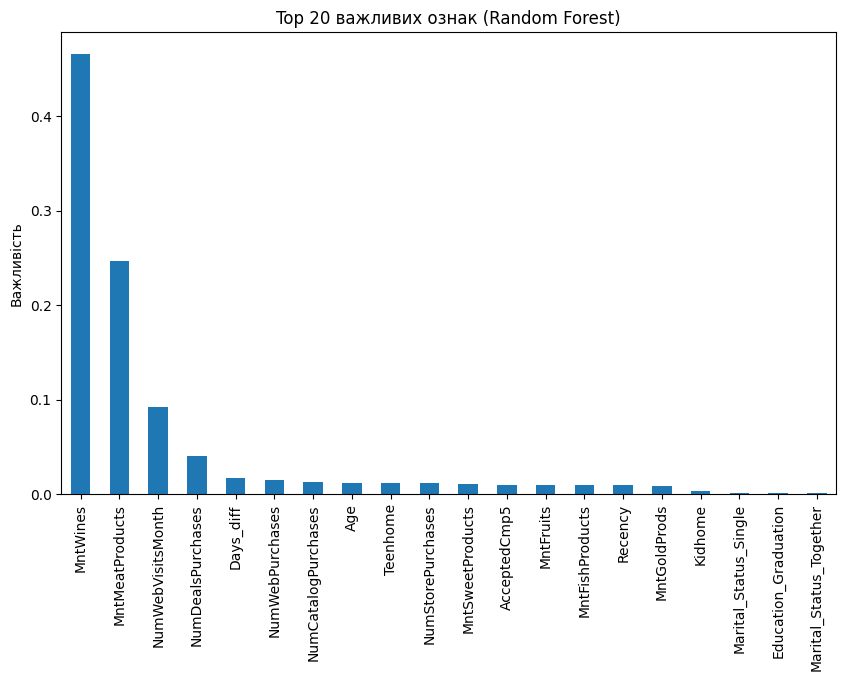

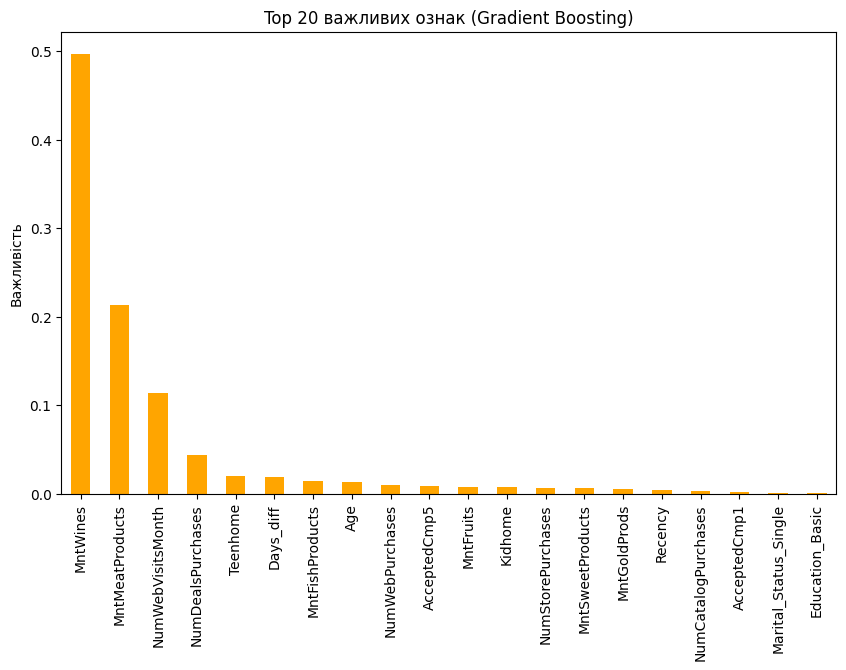

In [ ]:
# Витягаємо модель з пайплайну
rf_model = rf_pipeline.named_steps['regressor']
gb_model = gb_pipeline.named_steps['regressor']

# Feature importance
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Для назв колонок беремо після препроцесора
# Трансформовані числові + one-hot колонок
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(col_for_encoding)
all_features = col_for_scaling + list(ohe_features) + col_bin  # бінарні без змін

# Створюємо Series для сортування
rf_features = pd.Series(rf_importances, index=all_features).sort_values(ascending=False)
gb_features = pd.Series(gb_importances, index=all_features).sort_values(ascending=False)

# Вивід топ-20
print("Random Forest - топ 20 ознак:")
print(rf_features.head(20))

print("\nGradient Boosting - топ 20 ознак:")
print(gb_features.head(20))

# Візуалізація
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
rf_features.head(20).plot(kind='bar')
plt.title("Top 20 важливих ознак (Random Forest)")
plt.ylabel("Важливість")
plt.show()

plt.figure(figsize=(10,6))
gb_features.head(20).plot(kind='bar', color="orange")
plt.title("Top 20 важливих ознак (Gradient Boosting)")
plt.ylabel("Важливість")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'regressor__n_estimators': [200, 500, 800],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', 0.5, 0.8]
}

rf_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)

print("Best parameters:", rf_search.best_params_)
print("Best CV R2:", rf_search.best_score_)


Best parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 4, 'regressor__max_features': 0.8, 'regressor__max_depth': 30}
Best CV R2: 0.8064997516933963


# Найкраща модель

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# --- Random Forest ---
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,  # кількість дерев
        max_depth=None,    # можна обмежити, щоб уникнути перенавчання
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2: {r2_score(y_test, y_pred_rf):.2f}")

Random Forest
RMSE: 9121.72
R2: 0.84


In [ ]:
# df_test - датафрейм з тими ж ознаками, що використовувалися для тренування
# col_for_encoding, col_for_scaling, col_bin

# Прогнозування
y_pred_new = rf_pipeline.predict(df_test)

# Додаємо прогноз у датафрейм
df_test_copy = df_test.copy()
df_test_copy['Income_Predicted'] = y_pred_new

# Переглядаємо результат
display(df_test_copy.head())

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_diff,Year,Month,Day,Income_Predicted
ID,,,,,,,,,,,,,,,,,,,,,
1994,Graduation,Married,NaN,1,0,11,5,5,6,0,...,0,0,0,0,31,226,2013,11,15,27050.260
5255,Graduation,Single,NaN,1,0,19,5,1,3,3,...,0,0,0,0,28,494,2013,2,20,98896.630
7281,PhD,Single,NaN,0,0,80,81,11,50,3,...,0,0,0,0,55,236,2013,11,5,50357.080
7244,Graduation,Single,NaN,2,1,96,48,5,48,6,...,0,0,0,0,63,179,2014,1,1,42757.025
8557,Graduation,Single,NaN,1,0,57,11,3,22,2,...,0,0,0,0,32,377,2013,6,17,28566.480


In [ ]:
result = df_test_copy['Income_Predicted']

In [ ]:
result

,Income_Predicted
ID,
1994,27050.260
5255,98896.630
7281,50357.080
7244,42757.025
8557,28566.480
10629,28288.615
8996,51512.795
9235,34852.425
5798,72138.905


In [ ]:
result.to_csv('Income_missing_values')